In [0]:
from pandas import read_csv

dataframe = read_csv('dataset.csv', sep=',', names=('label', 'mean', 'var', 'p2p', 'min_v', 'max_v', 'time'))
dataframe.head()

,label,mean,var,p2p,min_v,max_v,time_ms
0,stable,1020.57,52.6286,19.1411,1013.57,1032.71,82231
1,stable,1020.46,53.7432,19.1411,1013.57,1032.71,82260
2,stable,1020.46,53.7432,19.1411,1013.57,1032.71,82289
3,stable,1019.97,49.1889,19.1411,1013.57,1032.71,82318
4,stable,1020.08,48.1550,19.1411,1013.57,1032.71,82347


In [0]:
labels   = dataframe['label'].values.tolist()
features = dataframe.loc[:, ['mean', 'var', 'p2p', 'min_v', 'max_v']].values.tolist()

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    filled=True,
    feature_names=dataframe.columns[1:-1],
    class_names=['stable', 'walking']
)

In [0]:
!pip install pydotplus

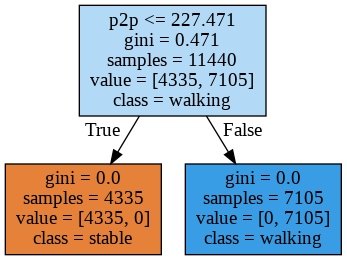

In [0]:
from pydotplus import graph_from_dot_data
from IPython.display import Image

Image(graph_from_dot_data(dot_data).create_png())